<a href="https://colab.research.google.com/github/tedheo10/STATS-504/blob/main/week1_1_add.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)
library(ggplot2)
options(repr.plot.width = 10 , repr.plot.height = 6, jupyter.plot_mimetypes = "image/png")
theme_set(theme_classic())

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# STATS 504
## Week 1: Exploratory data analysis

To follow along in today's lecture you'll need to load `tidyverse` and also install the `nycflights13` package:

In [3]:
install.packages('nycflights13')
library(nycflights13)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## What is exploratory data analysis

<img src="https://upload.wikimedia.org/wikipedia/en/e/e9/John_Tukey.jpg" style="margin: 0 0 0 20px; float: right" />

> Procedures for analyzing data, techniques for interpreting the results of such procedures, ways of planning the gathering of data to make its analysis easier, more precise or more accurate, and all the machinery and results of (mathematical) statistics which apply to analyzing data.



## EDA (concrete version)

1. Generate questions about your data.
2. Search for answers by visualizing, transforming, and modelling your data.
3. Use what you learn to refine your questions and/or generate new questions.
4. (Return to #1).

Two types of questions are always useful for making discoveries within your data:

- What type of variation occurs within my variables?
- What type of covariation occurs between my variables?

## Variation
- Real-life variables change from measurement to measurement.
- This is often true even if you measure the same thing twice!
- Each measurements has a small amount of error ("noise").
- The noise is different each time you take a measurement.

## Covariation
- Real-life variables tend to change together in a related way.
- The best way to spot covariation is to visualize the relationship between two or more variables.

## Continuous vs. discrete
The appropriate visualization will depend on whether the data are:
- *Continuous*: they take on an infinite number of ordered values.
- *Discrete*: the take on one of a small number of values.

## 🤔 Manfacturers

Continuous or discrete?: `mpg$manufacturer`

<ol style="list-style-type: upper-alpha;">
    <li>Continuous</li>
    <li>Discrete</li>
    <li>Could be either</li>
</ol>

In [4]:
head(mpg)
mpg$manufacturer %>% unique %>% length

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


[1] 15

## 🤔 Prices

Continuous or discrete?: `diamonds$price`

<ol style="list-style-type: upper-alpha;">
    <li>Continuous</li>
    <li>Discrete</li>
    <li>Could be either</li>
</ol>

In [5]:
diamonds$price %>% unique %>% length

[1] 11602

## 🤔 Ages

Continuous or discrete?: `mil$age`

<ol style="list-style-type: upper-alpha;">
    <li>Continuous</li>
    <li>Discrete</li>
    <li>Could be either</li>
</ol>

In [6]:
load("millennials.RData")
mil %>% select(age)%>% print

# A tibble: 2,020 × 1
   age                   
   <fct>                 
 1 28                    
 2 33                    
 3 45                    
 4 66                    
 5 52                    
 6 VOL DON'T KNOW/REFUSED
 7 60                    
 8 54                    
 9 48                    
10 48                    
# ℹ 2,010 more rows


## One continuous variable

First we will focus on understanding the distribution of one continuous variable.

`morley` is a built-in dataset measuring the speed of light:

In [7]:
head(morley)
morley$Speed

,Expt,Run,Speed
,<int>,<int>,<int>
001,1,1,850
002,1,2,740
003,1,3,900
004,1,4,1070
005,1,5,930
006,1,6,850


[1]  850  740  900 1070  930  850  950  980  980  880 1000  980  930  650  760
 [16]  810 1000 1000  960  960  960  940  960  940  880  800  850  880  900  840
 [31]  830  790  810  880  880  830  800  790  760  800  880  880  880  860  720
 [46]  720  620  860  970  950  880  910  850  870  840  840  850  840  840  840
 [61]  890  810  810  820  800  770  760  740  750  760  910  920  890  860  880
 [76]  720  840  850  850  780  890  840  780  810  760  810  790  810  820  850
 [91]  870  870  810  740  810  940  950  800  810  870

## 🤔 Types of variables
How would you describe the types `Expt`/`Run`/`Speed` in these data?

<ol style="list-style-type: upper-alpha;">
    <li>Continuous / Continuous / Continuous </li>
    <li>Discrete / Discrete / Discrete</li>
    <li>Continuous / Discrete / Continuous</li>
    <li>Discrete / Discrete / Continuous</li>
</ol>

Here we're measuring the speed of light, an absolute, unchanging, physical constant:

$$c = 299,792,458 \, m/s.$$

But we get a different value with every experiment. Why?

## Visualizing variation in our data

In order to understand how accurately we measured the speed of light, we first need to assess its *variation*. Since the measurement is continuous, we have several options:

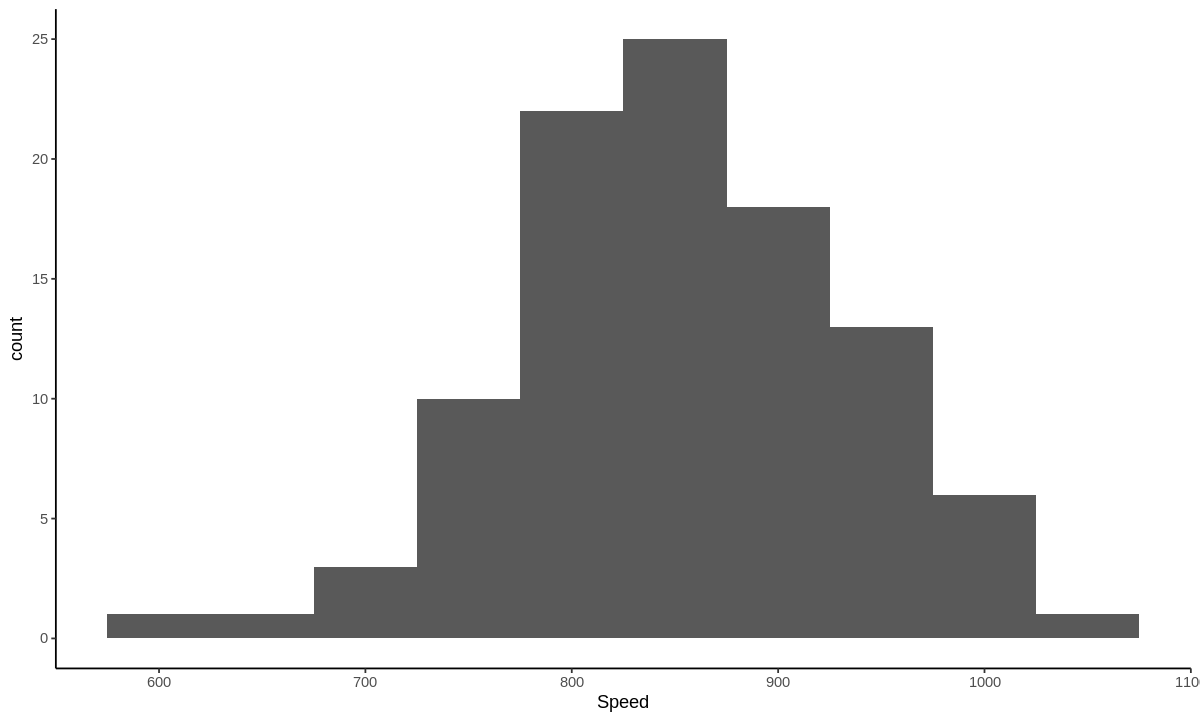

In [8]:
# plot a histogram

ggplot(morley) + geom_histogram(aes(x = Speed), bins=10)


### Adjusting a histogram
Any dataset can be plotted using multiple different histograms. For example:

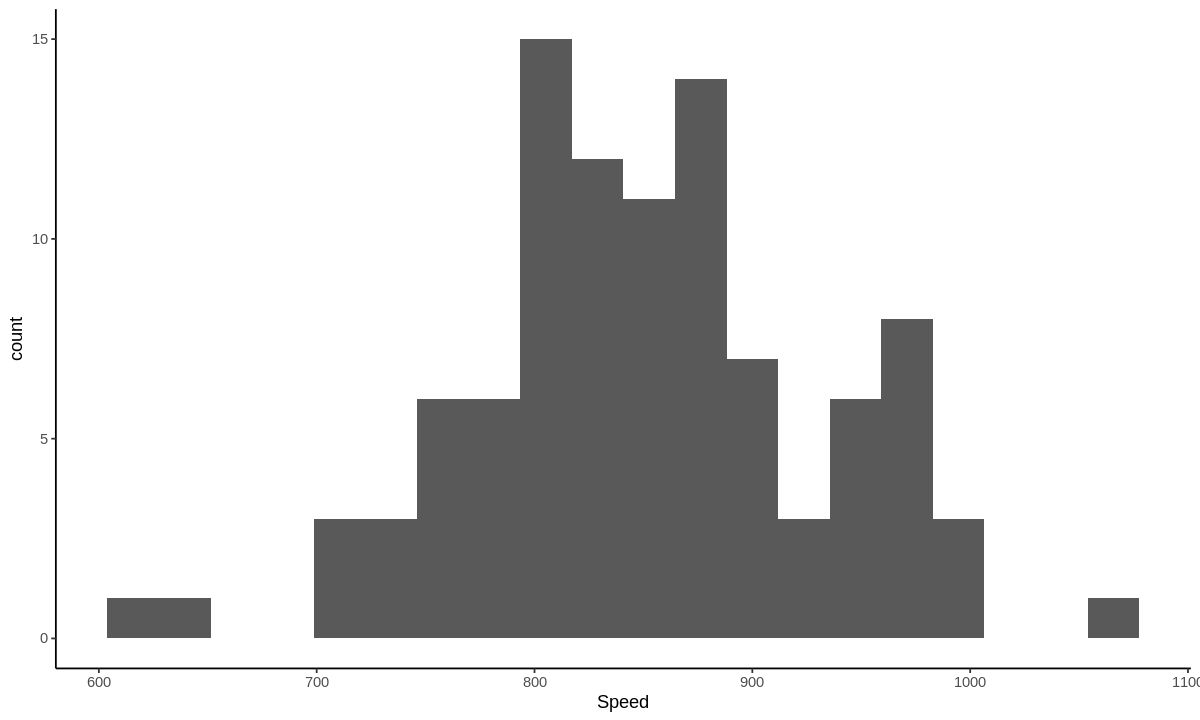

In [9]:
# adjust the bins/binwidth/breaks in a histogram
ggplot(morley) + geom_histogram(aes(x = Speed), bins=20)

There is no one right answer for "how many different bins" -- different values tell different stories about your variable
- Larger values of bins are more detailed but have higher *variance*
- Smaller values are smoother but have higher *bias*

## Follow-up questions
Now that we can see variation in our data, what sort of follow-up questions should we ask?

- Which values are the most common? Why?

- Which values are rare? Why? Does that match your expectations?

- Can you see any unusual patterns? What might explain them?

## The diamonds dataset
Let's look at a different dataset built into R:

In [10]:
print(diamonds)

# A tibble: 53,940 × 10
   carat cut       color clarity depth table price     x     y     z
   <dbl> <ord>     <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
 1  0.23 Ideal     E     SI2      61.5    55   326  3.95  3.98  2.43
 2  0.21 Premium   E     SI1      59.8    61   326  3.89  3.84  2.31
 3  0.23 Good      E     VS1      56.9    65   327  4.05  4.07  2.31
 4  0.29 Premium   I     VS2      62.4    58   334  4.2   4.23  2.63
 5  0.31 Good      J     SI2      63.3    58   335  4.34  4.35  2.75
 6  0.24 Very Good J     VVS2     62.8    57   336  3.94  3.96  2.48
 7  0.24 Very Good I     VVS1     62.3    57   336  3.95  3.98  2.47
 8  0.26 Very Good H     SI1      61.9    55   337  4.07  4.11  2.53
 9  0.22 Fair      E     VS2      65.1    61   337  3.87  3.78  2.49
10  0.23 Very Good H     VS1      59.4    61   338  4     4.05  2.39
# ℹ 53,930 more rows


This is a dataset of price, quality, and other characteristics for 54k diamonds.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2000  0.4000  0.7000  0.7979  1.0400  5.0100 

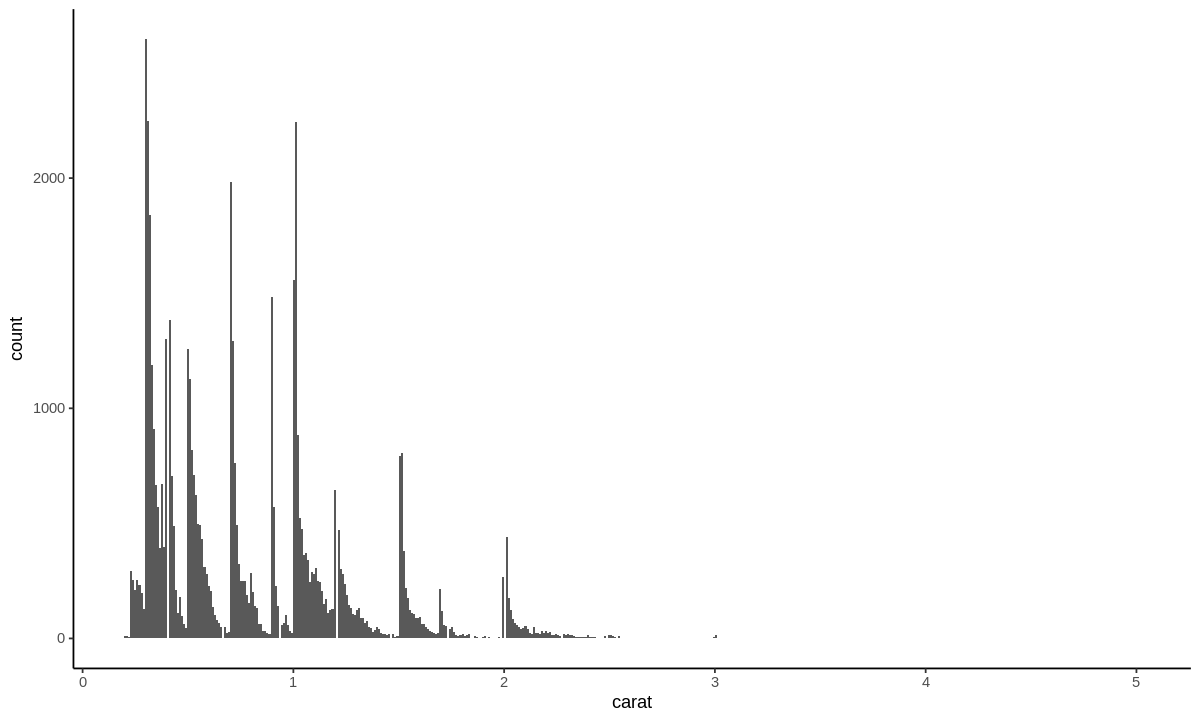

In [11]:
# histogram of carat

ggplot(diamonds) + geom_histogram(aes(x = carat), bins=500)

diamonds$carat %>% summary

## 🤔 Question

What can be said about the distribution of `carat` in the `diamonds` dataset? (Check all that apply.)

<ol style="list-style-type: upper-alpha;">
    <li>Almost all diamonds are &lt; 3 carats.</li>
    <li>Missing values are encoded as <code>carat = -1</code>.</li>
    <li>Diamond makers appear to prefer diamonds that are rounded to the nearest .1 or .5 or carat.
    <li>There are more diamonds between 0 and 1 carats than &gt;1 carats.</li>
    <li>There are more diamonds that measure 2.0 carats than there are that measure between 1.8 and 2.0 carats.</li>
</ol>

(Hint: plot a histogram, and try out different values for `bins`, `breaks`, or, `binwidth`.)

## Unusual values (outliers)
Outliers are "unusual" observations.
- Sometimes they are due to data entry errors.
- Sometimes they are important for other reasons.

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2.00,Premium,H,SI2,58.9,57,12210,8.09,58.9,8.06
0.51,Ideal,E,VS1,61.8,55,2075,5.15,31.8,5.12


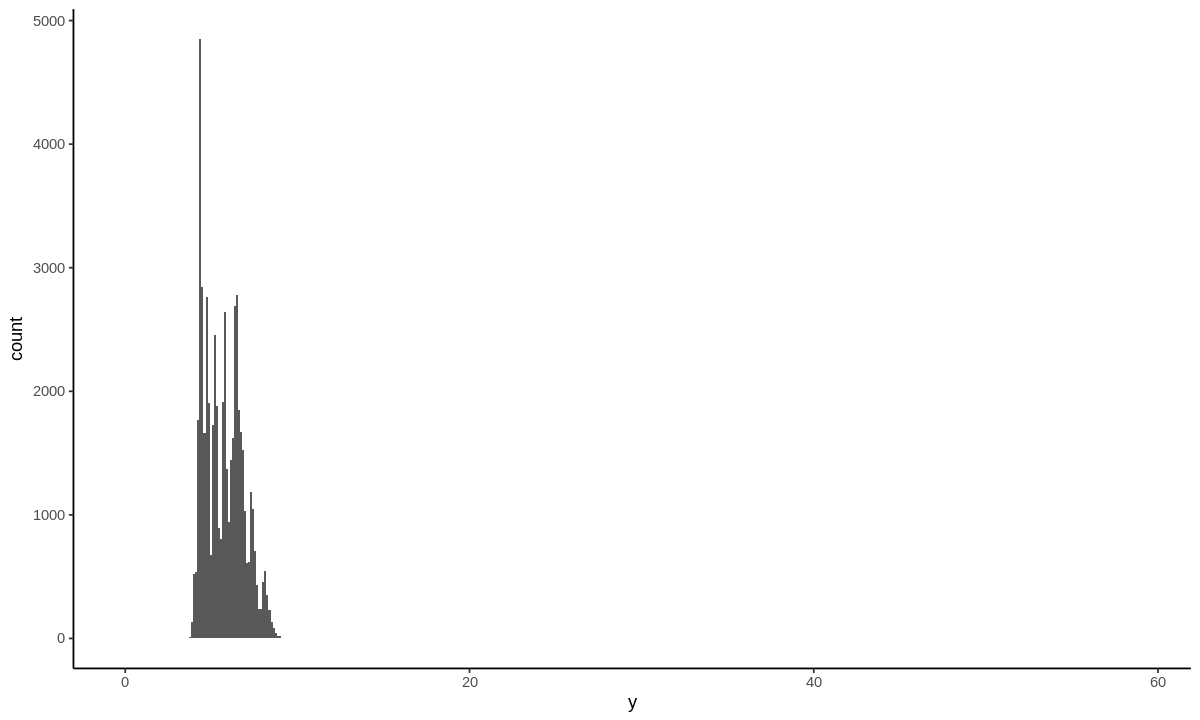

In [12]:
# histogram of diamonds$y
 ggplot(diamonds) + geom_histogram(aes(x = y), bins=500)

diamonds %>% filter(y > 20)

## Visualizing the distribution of a discrete variable
For a discrete variable, generally the only thing we're interested in is the count of each different value that the variable can assume. For this, something like a bar plot is often used:

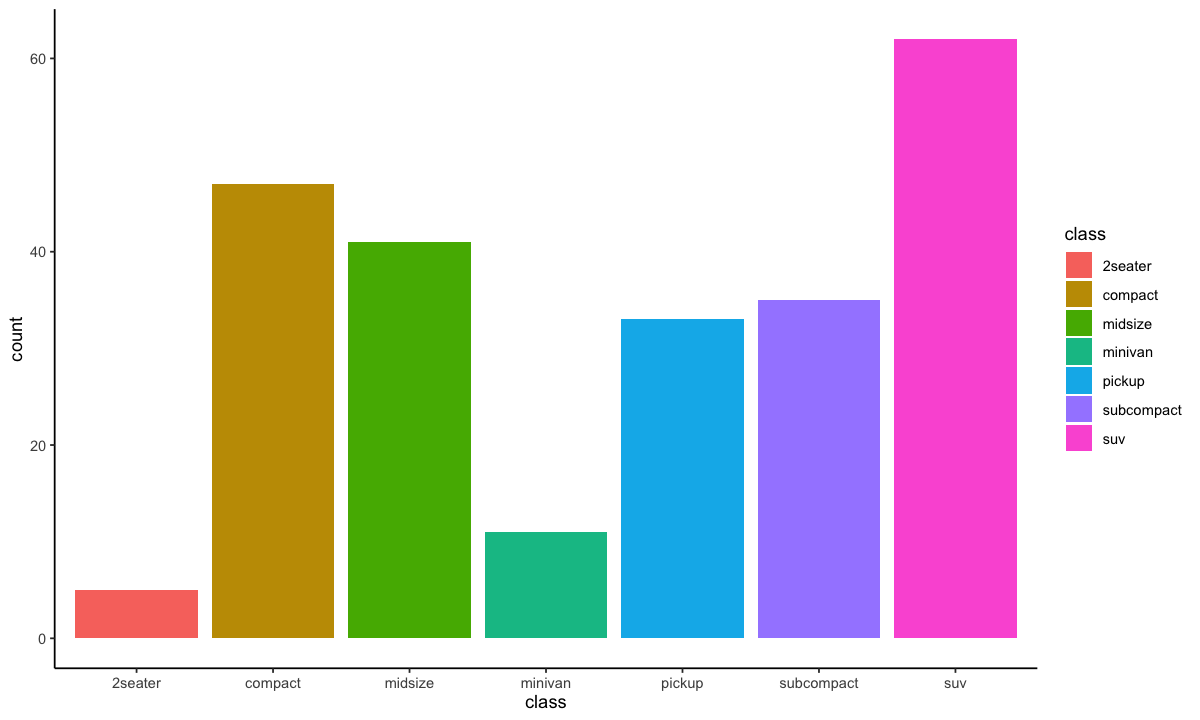

In [ ]:
ggplot(mpg) + geom_bar(aes(x = class, fill = class))

## Discrete variables with many values
Sometimes a discrete variable can take on a lot of values, such that it's not practical to plot its entire distribution. For example:

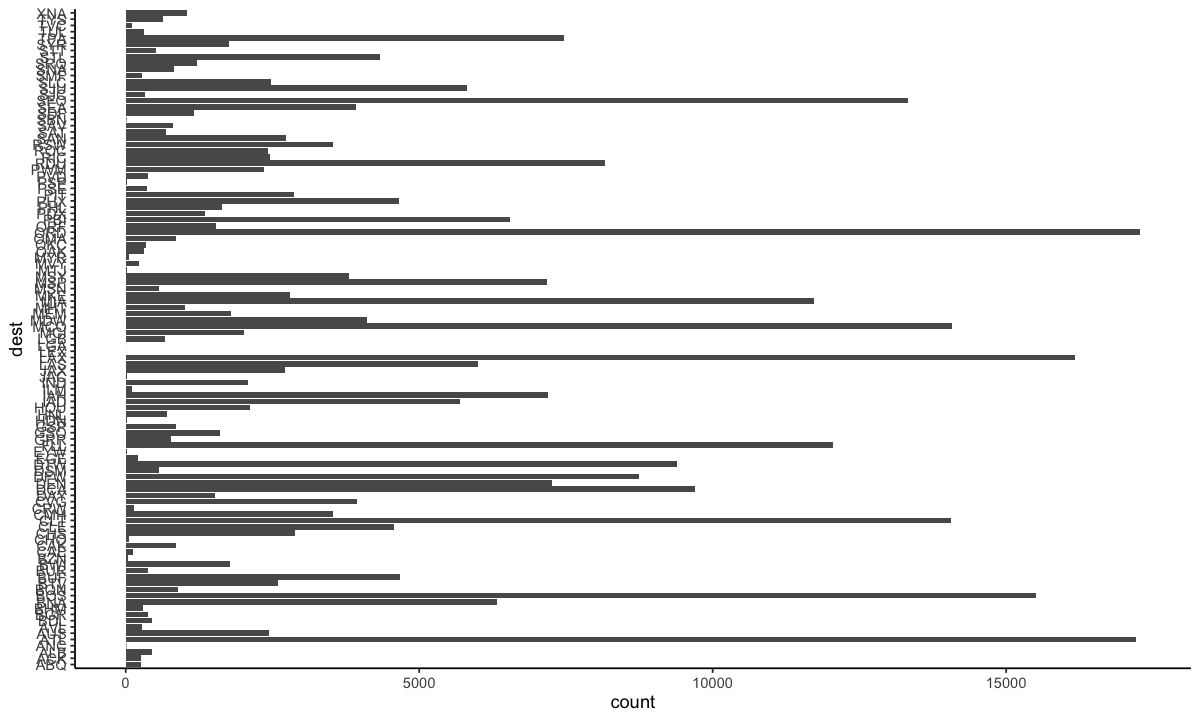

In [ ]:
# bar plot of flight destinations

flights %>% ggplot + geom_bar(aes(y = dest))

In this case we can reduce the data in some way, for example, only plotting the most common airports:

dest,n
<chr>,<int>
ORD,17283
ATL,17215
LAX,16174
BOS,15508
MCO,14082
CLT,14064
SFO,13331
FLL,12055
MIA,11728


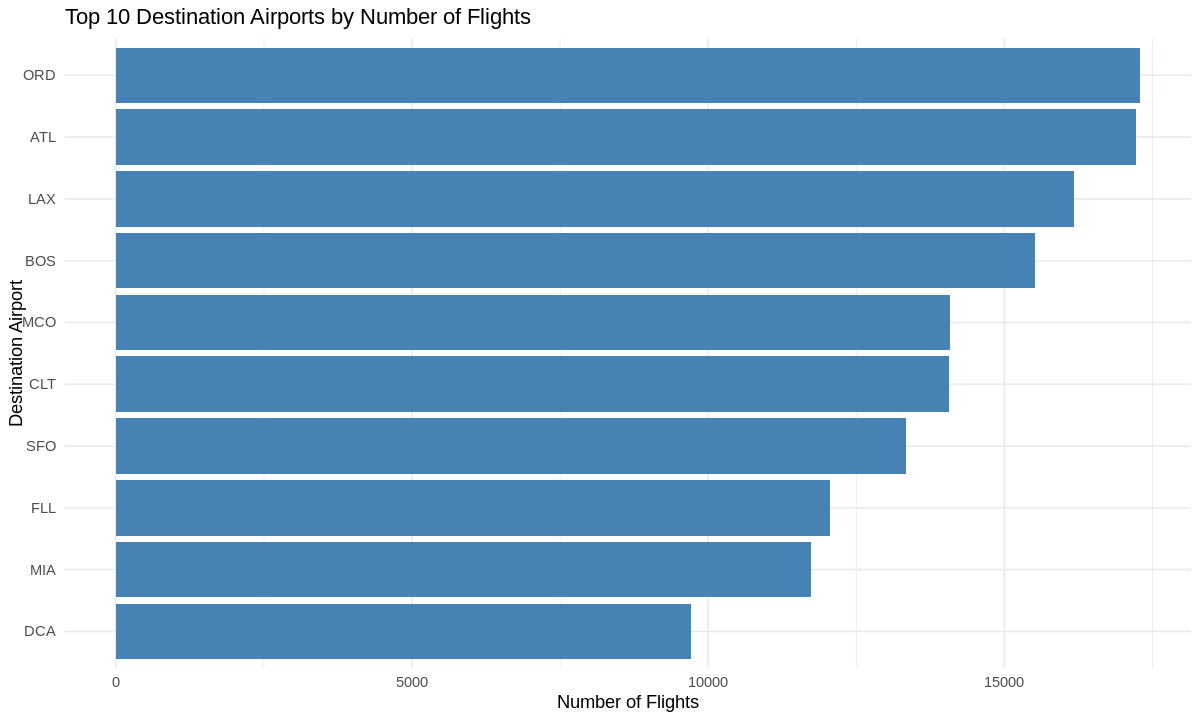

In [13]:
# counts of number of different destination
# find the top 10 airports
flights %>%
  count(dest, sort = TRUE) %>%
  slice_max(n, n = 10)


# Get top 10 destinations
top10_dest <- flights %>%
  count(dest, sort = TRUE) %>%
  slice_max(n, n = 10)

ggplot(top10_dest, aes(x = reorder(dest, n), y = n)) +
  geom_col(fill = "steelblue") +
  coord_flip() +  # Flips axes for better readability
  labs(
    title = "Top 10 Destination Airports by Number of Flights",
    x = "Destination Airport",
    y = "Number of Flights"
  ) +
  theme_minimal()


## Covariation
**Covariation** is when multiple variables vary together in a similar way. Covariation is everwhere, e.g.:
- Height and weight
- Political preference and religion
- Income this year vs. income last year
- Etc.

One of the best way to spot covariation is to visualize the "joint distribution" of both variables.

When studying covariation among two variables, there are three possibilities, depending on whether the variables are continuous, discrete, or a mixture.

## Continuous and discrete
With one continuous and one discrete variable, there are several choices:
- Box-and-whisker plot
- Multiple/colored histograms

Let's return to the `morley` dataset and consider covariation between `Expt` (experiment) and `Speed`:

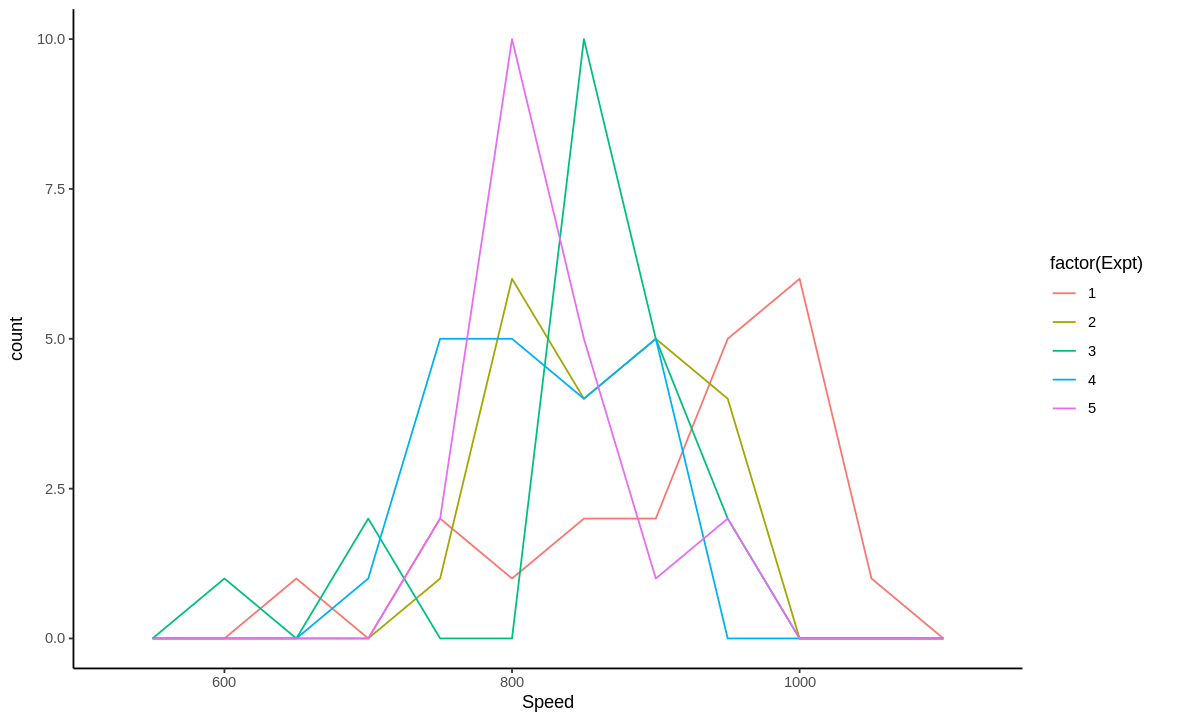

In [14]:
ggplot(morley) + geom_freqpoly(aes(x = Speed, color = factor(Expt)), bins=10)


Let's study covariation of `cut` and `price` in the `diamonds` data set.

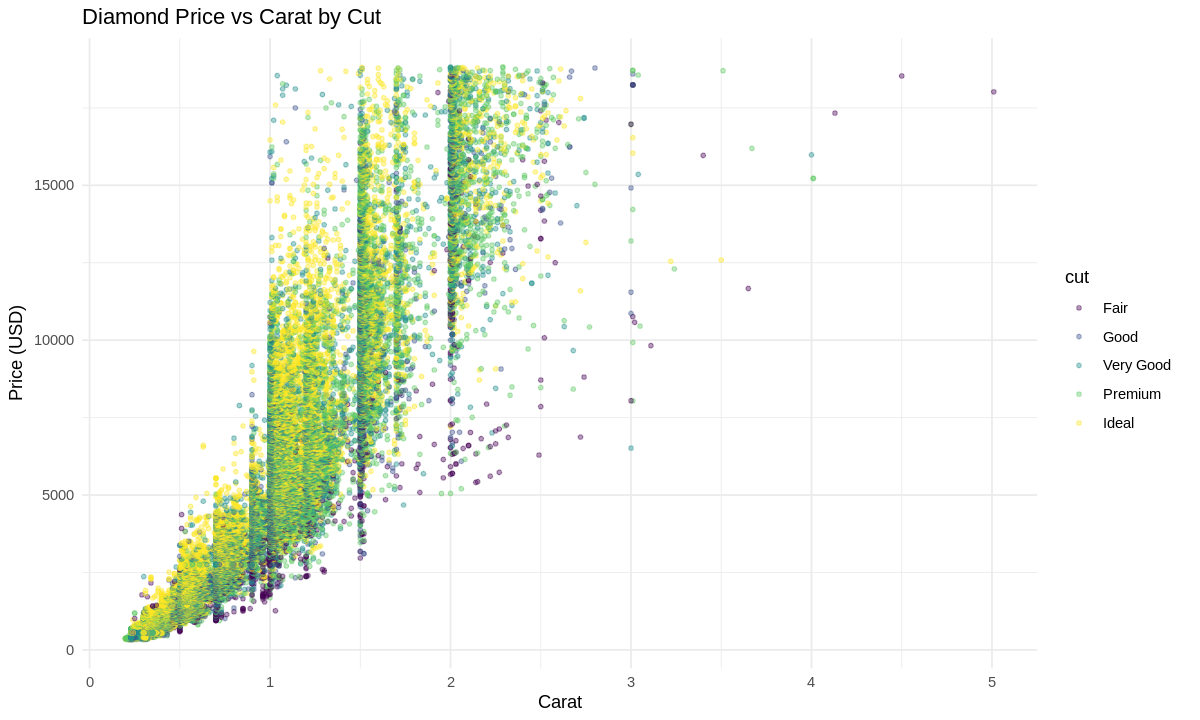

In [15]:
# boxplot cut vs price
ggplot(diamonds, aes(x = carat, y = price, color = cut)) +
  geom_point(alpha = 0.4, size = 1) +
  labs(
    title = "Diamond Price vs Carat by Cut",
    x = "Carat",
    y = "Price (USD)"
  ) +
  theme_minimal()



## Two discrete variables
To study covariation between two discrete variables, we can count the number of observations for each combination of values:

In [16]:
# geom_count to count the number of values for color and cut

xtabs(~ color + cut, diamonds) %>% prop.table %>% round(3)

     cut
color  Fair  Good Very Good Premium Ideal
    D 0.003 0.012     0.028   0.030 0.053
    E 0.004 0.017     0.044   0.043 0.072
    F 0.006 0.017     0.040   0.043 0.071
    G 0.006 0.016     0.043   0.054 0.091
    H 0.006 0.013     0.034   0.044 0.058
    I 0.003 0.010     0.022   0.026 0.039
    J 0.002 0.006     0.013   0.015 0.017

Another type of plot you will see often (especially in bio) is a heat map:

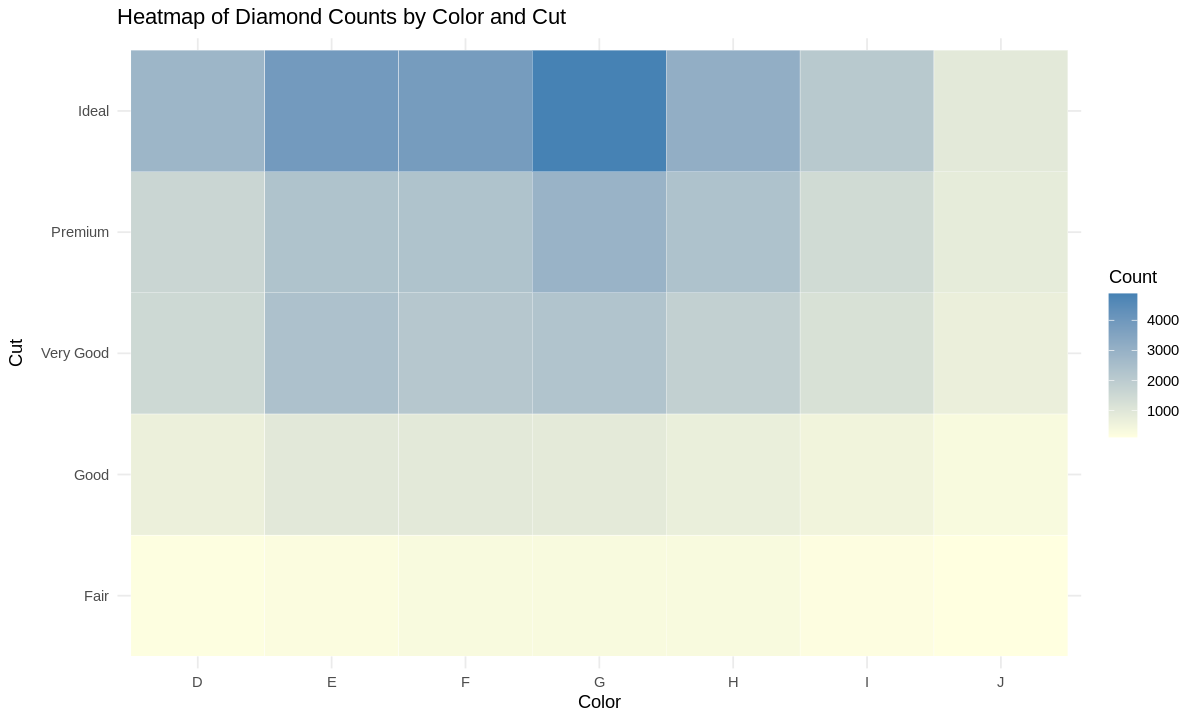

In [17]:
# geom_tile to count the number of values for color and cut

# Count combinations of cut and color
diamond_counts <- diamonds %>%
  count(cut, color)

# Plot heatmap
ggplot(diamond_counts, aes(x = color, y = cut, fill = n)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = "lightyellow", high = "steelblue") +
  labs(
    title = "Heatmap of Diamond Counts by Color and Cut",
    x = "Color",
    y = "Cut",
    fill = "Count"
  ) +
  theme_minimal()


## Two continuous variables
Finally, if we're studying the covariation between two continuous variables, we have several options:
- Scatter plot (`geom_point`)
- Binning (`geom_bin2d`/`geom_hex`)
- Contour/bivariate density (`geom_density_2d`)

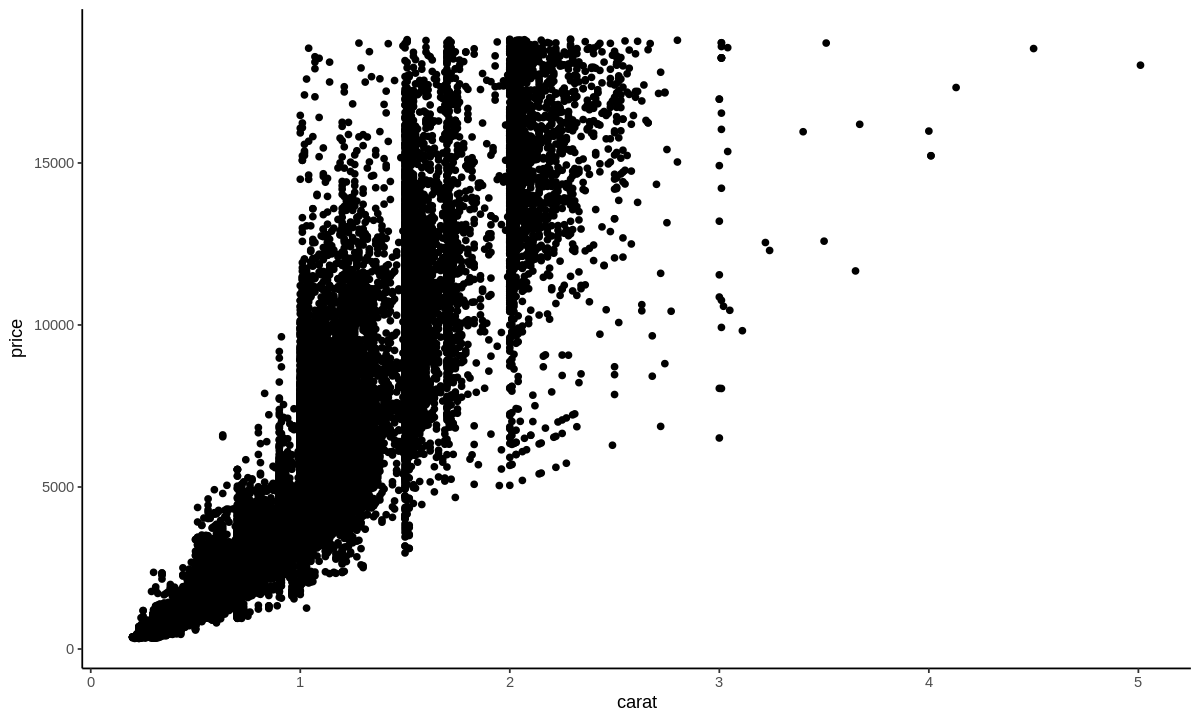

In [18]:
# different geoms for carat vs. price
diamonds %>% ggplot(aes(x = carat, y = price)) + geom_point()

## Three or more variables
Sometimes we even want to study the covariance among of three or more variables. Visualizing >2 dimensional data is, in general, challenging. The best solution tends to depend on the problem at hand.

## Speed of light
Let's consider covariation between all three variables in `morley`:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


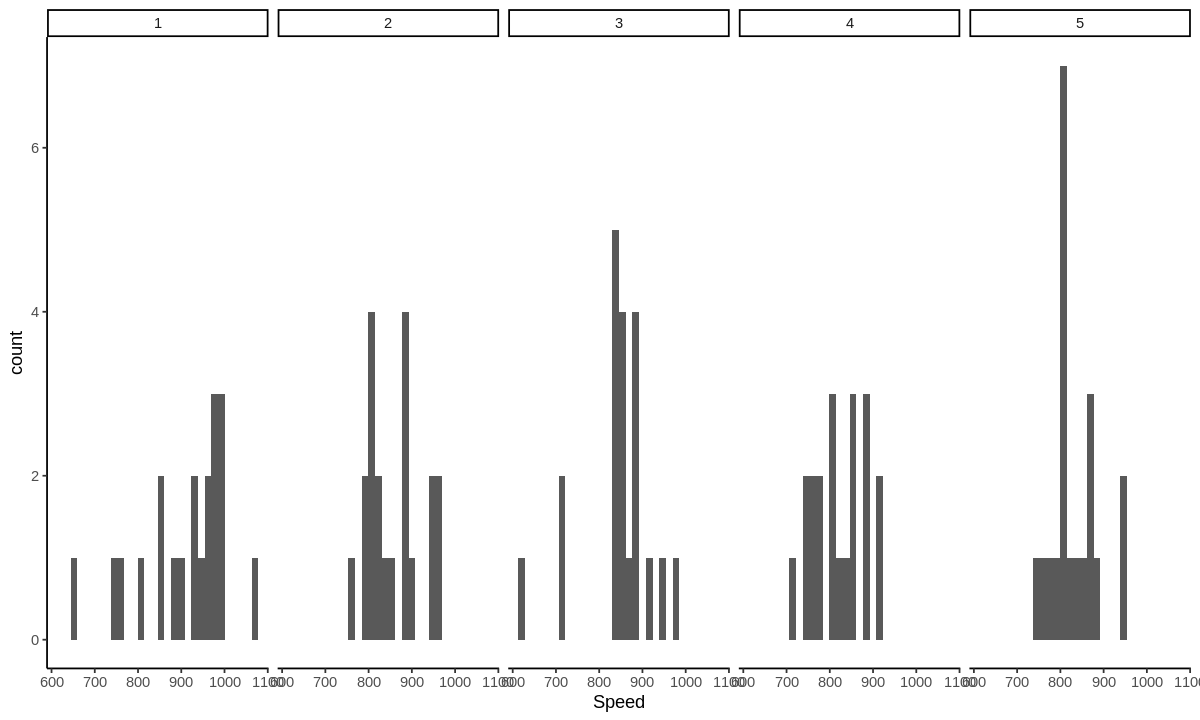

In [19]:
# covariation between Speed, Run, and Expt
morley %>% ggplot(aes(x = Speed)) + geom_histogram() +
    facet_grid(~ factor(Expt))

## Millenials
Let's use these techniques to explore a data set released by the [Pew Research Center](https://www.pewsocialtrends.org/2010/02/24/millennials-confident-connected-open-to-change/) on ... millennials!

![millennials](https://images2.minutemediacdn.com/image/upload/c_crop,h_1189,w_2119,x_0,y_225/f_auto,q_auto,w_1100/v1561494201/shape/mentalfloss/586493-istock-862201574.jpg)

In [20]:
load("millennials.RData")
mil %>% print

# A tibble: 2,020 × 31
   age   state q1    q8a   q8b   q8c   q8d   q8e   q8f   q8g   q8h   q19   q20  
   <fct> <chr> <fct> <fct> <fct> <fct> <fct> <fct> <fct> <fct> <fct> <fct> <fct>
 1 28    NY    Very… Very… Very… Very… Very… Very… Not … Very… Very… No    NA   
 2 33    NE    Very… Not … One … One … Very… Very… Not … One … One … Yes   Abou…
 3 45    IN    Pret… Some… One … Some… One … Some… Not … Some… Very… Yes   Abou…
 4 66    IN    Very… Very… Very… Very… Very… Some… Not … Very… Very… No    NA   
 5 52    VA    Very… One … Very… Very… One … Some… Not … Very… Very… Yes   Ever…
 6 VOL … MD    Very… Some… One … One … Very… Some… Not … (VOL… Very… Yes   Abou…
 7 60    PA    Pret… Not … One … One … One … One … Not … One … One … No    NA   
 8 54    NC    Not … Very… Very… Very… One … Very… Not … Very… Very… NA    NA   
 9 48    FL    Pret… Some… One … One … One … Very… Not … Very… Very… Yes   Once…
10 48    MO    Pret… Some… Very… Very… One … Very… Not … One … Some… Yes   Once…
# ℹ 2

Each column of the data corresponds to one of the question asked during the survey. You can find the full script [here](https://docs.google.com/file/d/14U2-rS_ljS7kH97PMFqmNMKDwefSL5AS/edit?usp=docslist_api&filetype=msword).

## 🤔 Ages

What would be a good way to visualize `mil$age`?

<ol style="list-style-type: upper-alpha;">
    <li>Histogram</li>
    <li>Scatter plot</li>
    <li>Line plot</li>
    <li>Density plot</li>
    <li>Something else</li>
</ol>

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `age = as.numeric(as.character(age))`.
Caused by warning:
! NAs introduced by coercion”


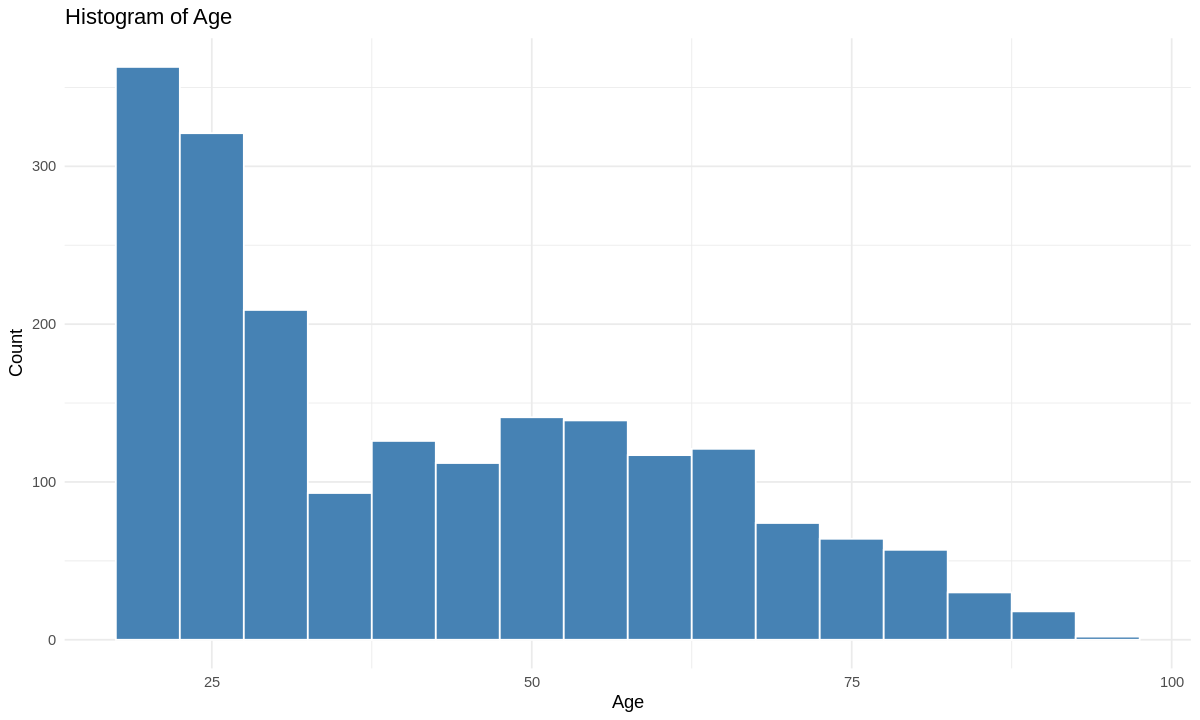

In [21]:
mil_clean <- mil %>%
  mutate(age = as.numeric(as.character(age))) %>%  filter(!is.na(age))


ggplot(mil_clean, aes(x = age)) +
  geom_histogram(binwidth = 5, fill = "steelblue", color = "white") +
  labs(title = "Histogram of Age", x = "Age", y = "Count") +
  theme_minimal()


## 🤔 Geography

What would be a good way to visualize `mil$state`?

<ol style="list-style-type: upper-alpha;">
    <li>Histogram</li>
    <li>Bar plot</li>
    <li>Scatter plot</li>
    <li>Line plot</li>
    <li>Something else</li>
</ol>

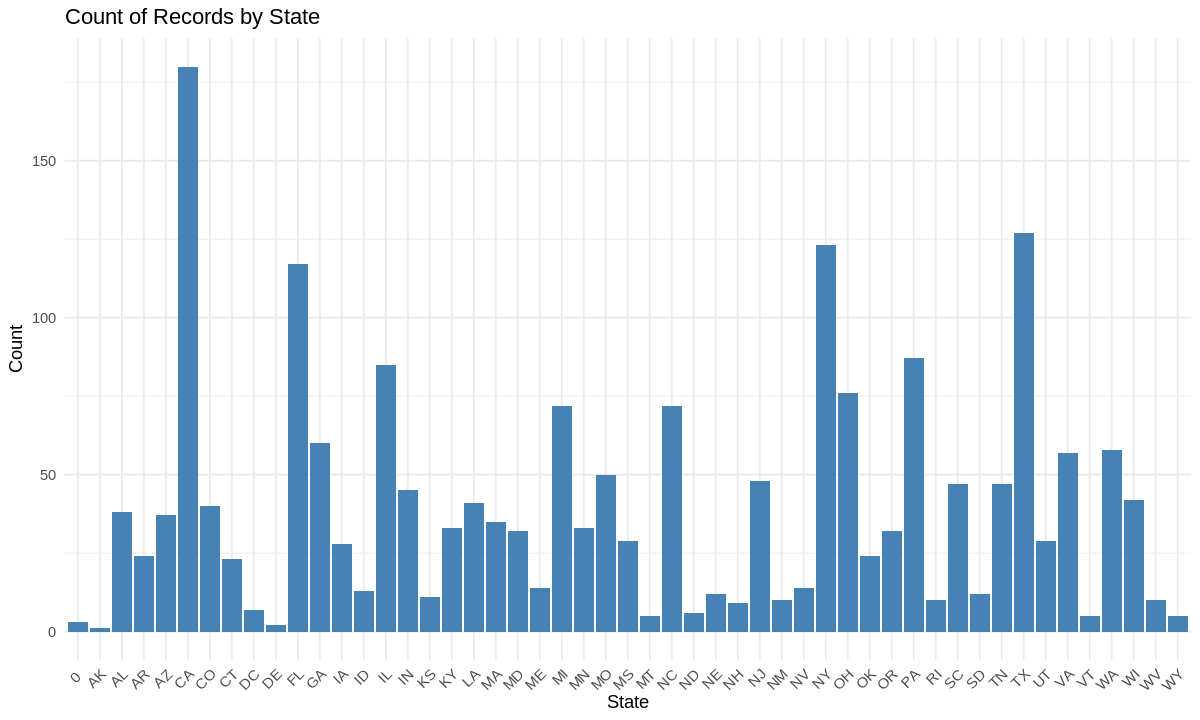

In [22]:
# visualize state

ggplot(mil, aes(x = state)) +
  geom_bar(fill = "steelblue") +
  labs(title = "Count of Records by State", x = "State", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [23]:
install.packages("mapproj")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘maps’




Joining with `by = join_by(state)`
Joining with `by = join_by(abbr)`


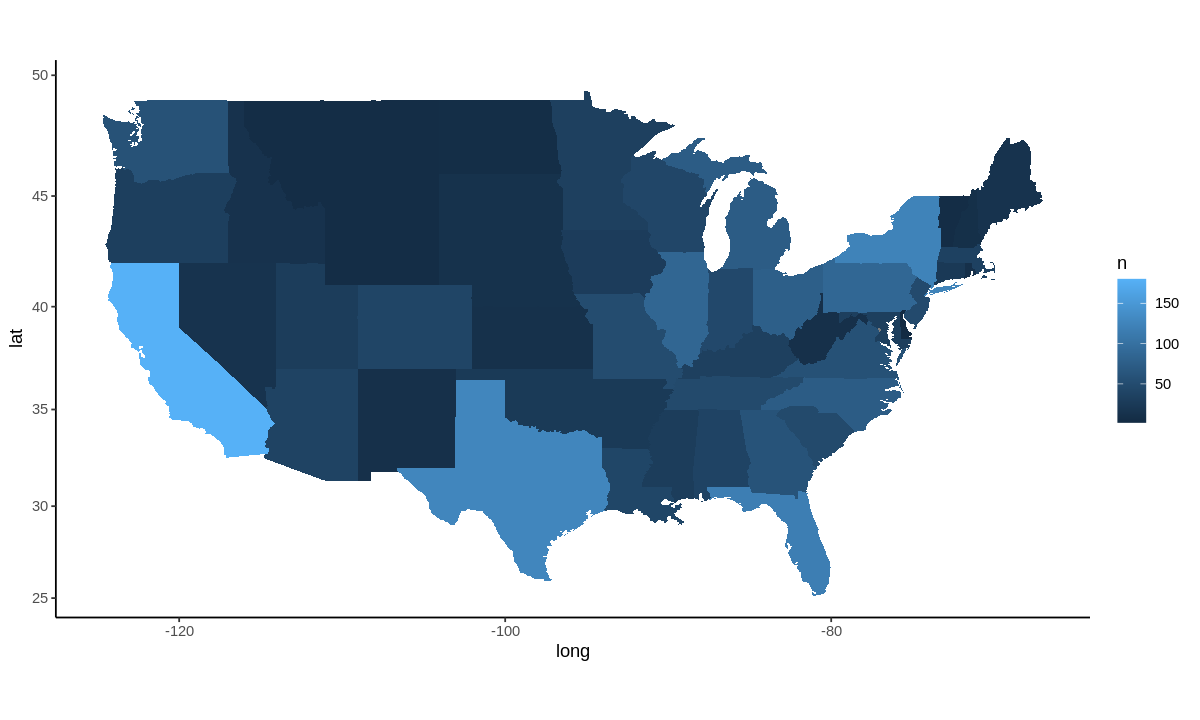

In [24]:
mil_states <- count(mil, state) %>% rename(abbr=state)
states <- map_data("state")
states %>% mutate(state=region) %>%
    left_join(tibble(abbr=state.abb, state=str_to_lower(state.name))) %>%
    left_join(mil_states) %>%
    ggplot + geom_polygon(aes(x=long, y=lat, group=group, fill=n)) +
    coord_map()

## Life goals
Columns `q8a-q8h` ask the respondents to rate the importance of:

    a.  Being successful in a high-paying career or profession
    b.  Having a successful marriage
    c.  Living a very religious life
    d.  Being a good parent
    e.  Having lots of free time to relax or do things you want to do
    f.  Becoming famous
    g.  Helping other people who are in need
    h.  Owning your own home
    
The response scale is:

    1 One of the most important things
    2 Very important but not the most
    3 Somewhat important
    4 Not important
    9 Don’t know/Refused (VOL.)
    
What is a good way to summarize these responses?

# A tibble: 16,160 × 2
   goal  importance                      
   <chr> <fct>                           
 1 q8a   Very important but not the most 
 2 q8b   Very important but not the most 
 3 q8c   Very important but not the most 
 4 q8d   Very important but not the most 
 5 q8e   Very important but not the most 
 6 q8f   Not important                   
 7 q8g   Very important but not the most 
 8 q8h   Very important but not the most 
 9 q8a   Not important                   
10 q8b   One of the most important things
# ℹ 16,150 more rows


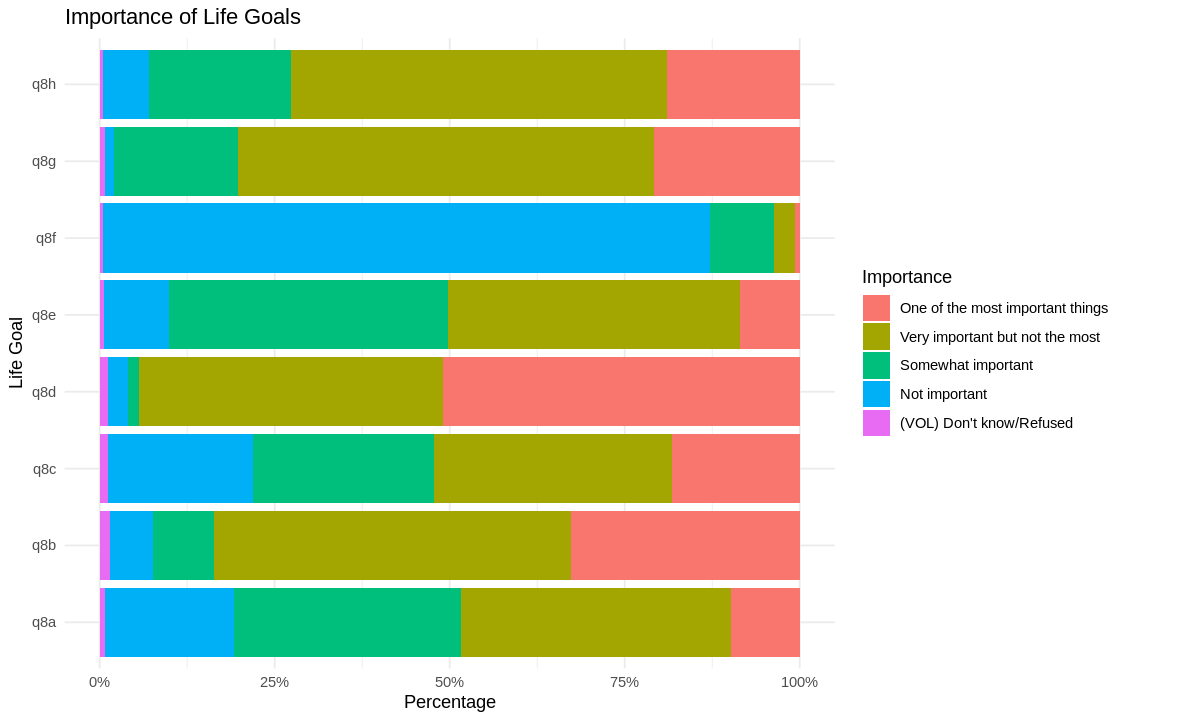

In [25]:
# Summarizing goals
# Suppose your data frame is called `df`
# Gather questions into long format
mil_long <- mil %>%
  select(q8a:q8h) %>%
  pivot_longer(cols = everything(), names_to = "goal", values_to = "importance")
# %>%
#  filter(importance != 9)  # optionally exclude DK/refused
print(mil_long)

# Plot stacked bar chart
ggplot(mil_long, aes(x = goal, fill = importance)) +
  geom_bar(position = "fill") + # fill to show proportions
  scale_y_continuous(labels = scales::percent_format()) +
  labs(
    title = "Importance of Life Goals",
    x = "Life Goal",
    y = "Percentage",
    fill = "Importance"
  ) +
  theme_minimal() +
  coord_flip()



## Social networking

    Q.20	How often do you visit the social networking site you use most often… several times a day, about once a day, every few days, once a week or less often?
    
What sort of variable is this (`mil$q20`)? How should we visualize it?

In [26]:
summary(mil$q20)

Several times a day         About once a day           Every few days 
                     249                      244                      217 
             Once a week               Less often (VOL) Don't know/Refused 
                     140                      176                        1 
                    NA's 
                     993

## Beyond plotting
Some other EDA tools that are useful:
- Dimensionality reduction (e.g. PCA)
- Missing value analysis

## Flights data
- In the next slide, we will analyze a dataset of information about flights.
- Here we will analyze a pre-formatted version.

In [27]:
library(nycflights13)

flights %>% print

# A tibble: 336,776 × 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# ℹ 336,766 more rows
# ℹ 1

## Dimensionality reduction
- For each flight we have a lot of data.
- How to make sense of it all?
- Idea: embed each data point in a lower-dimensional space.

In [28]:
# Join flights with weather and airports data
data <- flights %>%
  left_join(weather, by = c("year", "month", "day", "hour", "origin")) %>%
  left_join(airports %>% select(faa, lat, lon), by = c("dest" = "faa"))

In [29]:
data %>% select(where(is.numeric)) %>% select(-year) %>% scale() %>% as_tibble %>%
    drop_na() -> numeric_data
print(numeric_data)

# A tibble: 71,623 × 24
   month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <dbl> <dbl>    <dbl>          <dbl>     <dbl>    <dbl>          <dbl>
 1 -1.63 -1.68    -1.67          -1.74  -0.215      -1.22          -1.42
 2 -1.63 -1.68    -1.63          -1.59  -0.464      -1.29          -1.41
 3 -1.63 -1.68    -1.62          -1.59  -0.389      -1.49          -1.64
 4 -1.63 -1.68    -1.62          -1.59  -0.364      -1.40          -1.59
 5 -1.63 -1.68    -1.62          -1.59  -0.339      -1.05          -1.26
 6 -1.63 -1.68    -1.53          -1.59  -0.314      -1.22          -1.36
 7 -1.63 -1.68    -1.53          -1.59  -0.314      -1.25          -1.43
 8 -1.63 -1.68    -1.53          -1.57  -0.513      -1.29          -1.44
 9 -1.63 -1.68    -1.53          -1.58  -0.389      -1.28          -1.47
10 -1.63 -1.68    -1.49          -1.57   0.00898    -1.09          -1.25
# ℹ 71,613 more rows
# ℹ 17 more variables: arr_delay <dbl>, flight <dbl>, air_time <dbl>,
#   dista

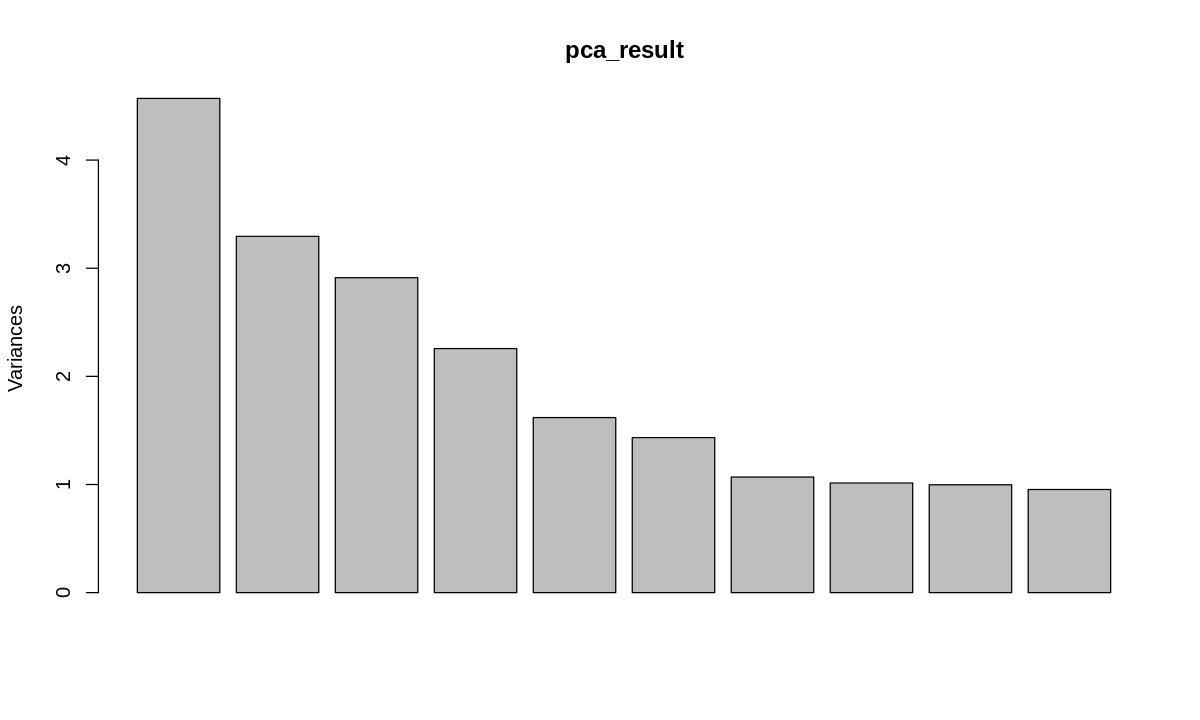

In [30]:
# Apply PCA
pca_result <- prcomp(numeric_data, center = TRUE, scale. = TRUE)

# View summary of PCA
# summary(pca_result)

plot(pca_result)

Warning message:
“`as.tibble()` was deprecated in tibble 2.0.0.
ℹ Please use `as_tibble()` instead.
ℹ The signature and semantics have changed, see `?as_tibble`.”


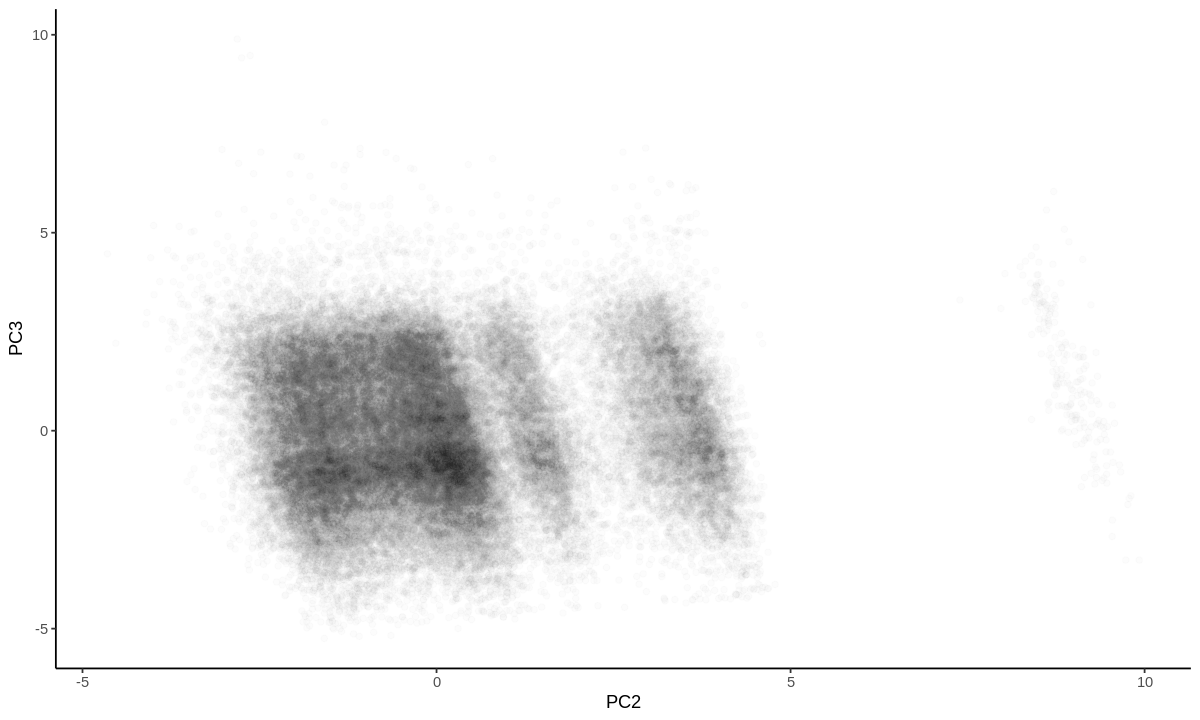

In [31]:
# Convert the top two principal components to a dataframe
pca_data <- as.tibble(pca_result$x[, 1:3])

# Create scatter plot
ggplot(pca_data, aes(x = PC2, y = PC3)) + geom_point(alpha=.01)

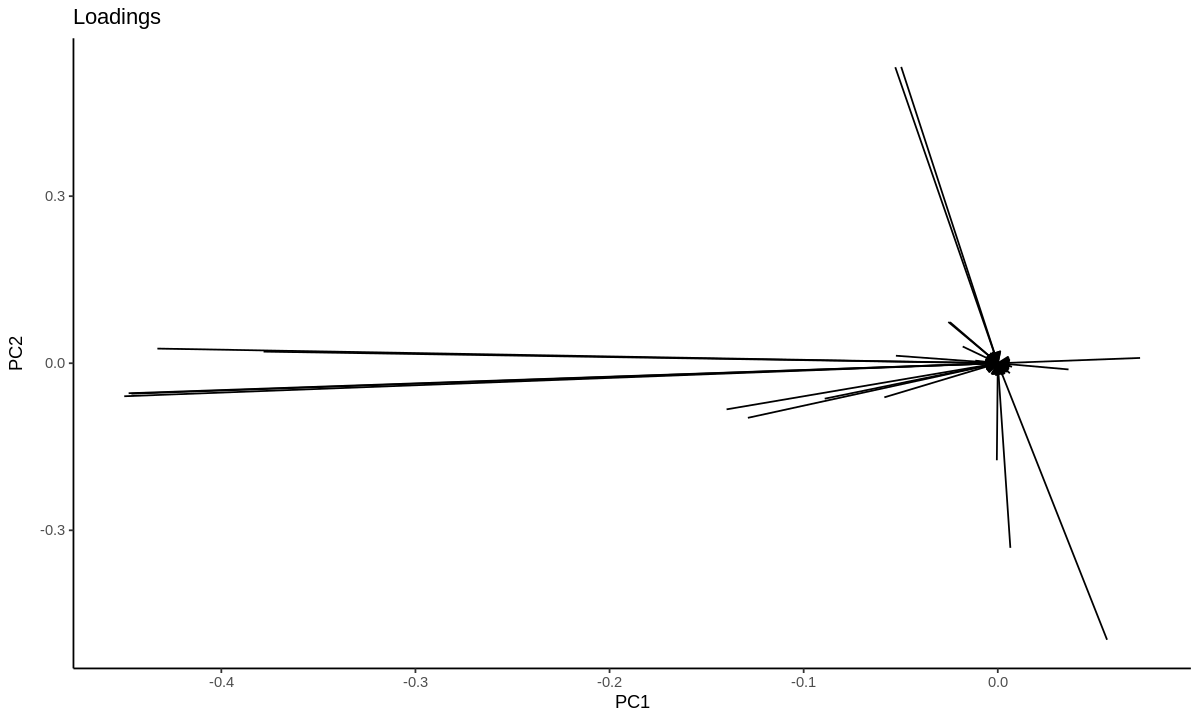

In [32]:
loadings <- as_tibble(pca_result$rotation[, 1:2])

ggplot(loadings, aes(x = PC1, y = PC2)) +
  geom_segment(aes(xend = 0, yend = 0), arrow = arrow(type = "closed", length = unit(0.1, "inches"))) +
  labs(title = "Loadings", x = "PC1", y = "PC2")

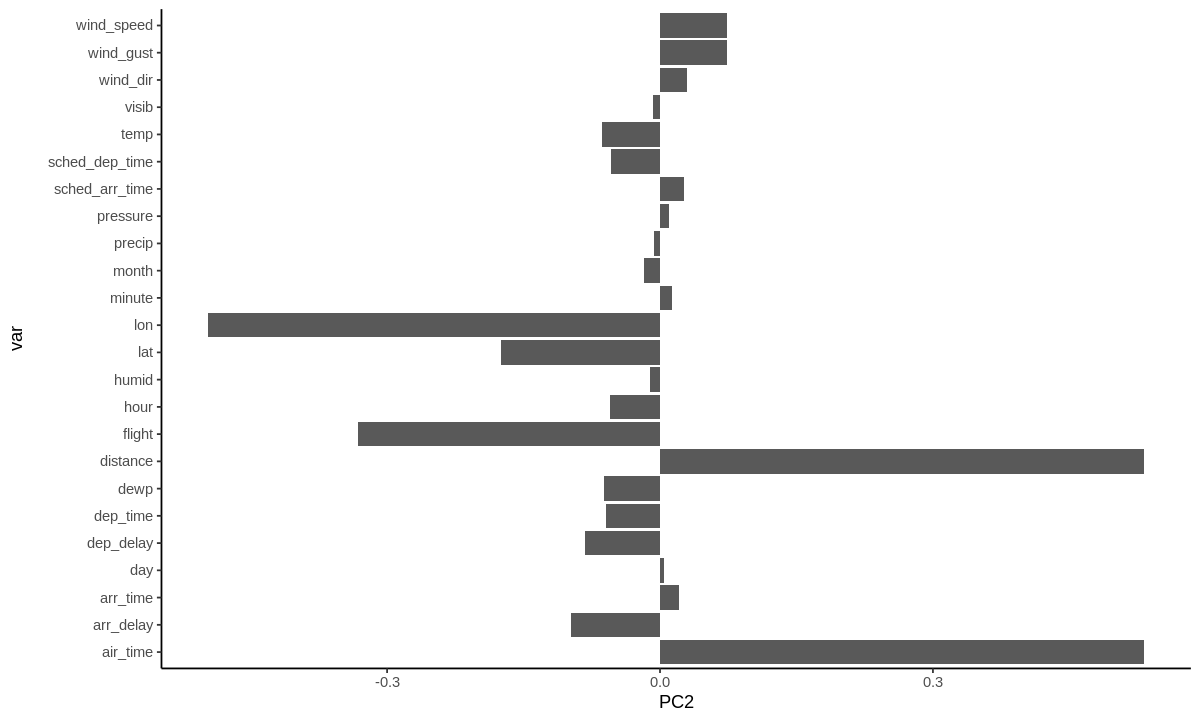

In [33]:
loadings$var <- colnames(numeric_data)

ggplot(loadings) + geom_col(aes(x=var, y=PC2)) + coord_flip()

## Missing data analysis
- Missing data may indicate something important.

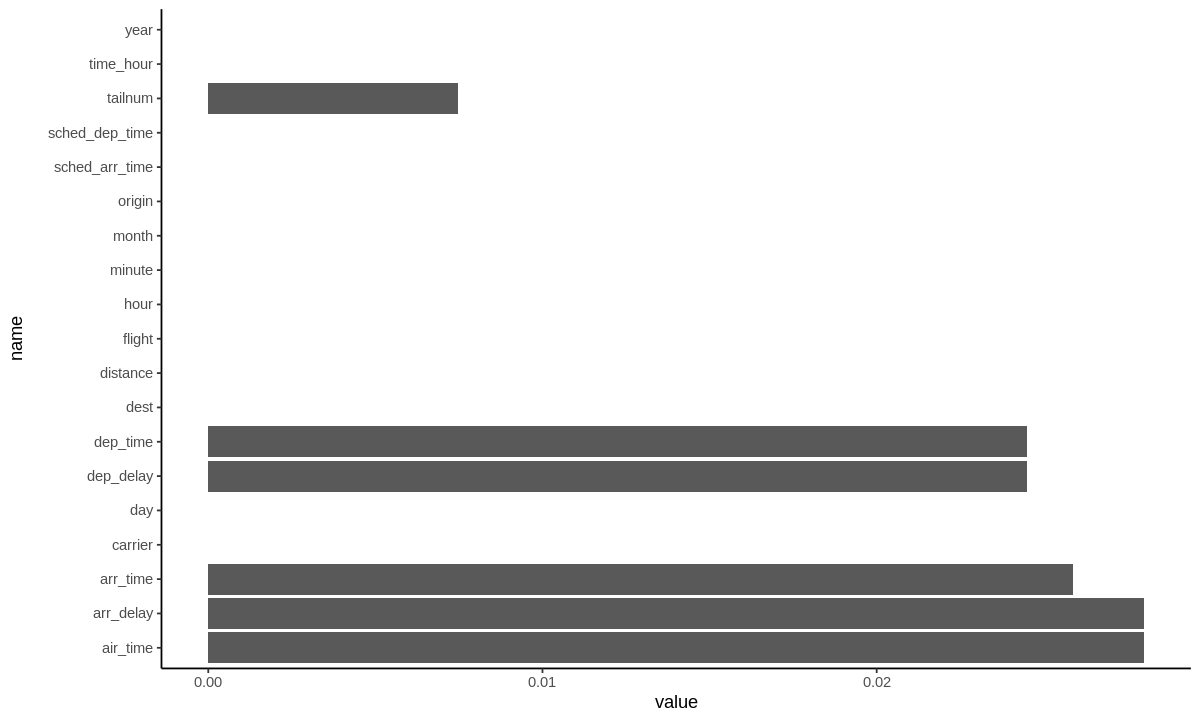

In [34]:
flights %>% summarise_all(~ mean(is.na(.))) %>% pivot_longer(everything()) %>%
    ggplot + geom_col(aes(x=name, y=value)) + coord_flip()

# calculate proportion of missing value in each column
# transform data from wide to long format
# Creates a bar plot for proportion of missing data

What (if anything) do these missing values mean?

In [35]:
flights_ext <- flights %>%
  mutate(cancelled = if_else(is.na(dep_delay), 1, 0))

# Adds a new column name
# Check each row if the departure delay is missing
# assign 1 if cancelled
# assign 0 if not cancelled


In [36]:
weather_agg <- weather %>%
  group_by(year, month, day, origin) %>%
  summarize(average_temp = mean(temp, na.rm = TRUE),
            average_visib = mean(visib, na.rm = TRUE),
            average_wind_speed = mean(wind_speed, na.rm = TRUE),
            max_gust = max(wind_gust, na.rm = TRUE),
            total_precip = sum(precip, na.rm = TRUE))

Warning message:
“There were 295 warnings in `summarize()`.
The first warning was:
ℹ In argument: `max_gust = max(wind_gust, na.rm = TRUE)`.
ℹ In group 7: `year = 2013`, `month = 1`, `day = 3`, `origin = "EWR"`.
Caused by warning in `max()`:
! no non-missing arguments to max; returning -Inf
ℹ Run `dplyr::last_dplyr_warnings()` to see the 294 remaining warnings.”
`summarise()` has grouped output by 'year', 'month', 'day'. You can override
using the `.groups` argument.


In [ ]:
weather_agg %>% print

flights_weather <- flights_ext %>%
  left_join(weather_agg, by = c("year", "month", "day", "origin"))

# A tibble: 1,092 × 9
# Groups:   year, month, day [364]
    year month   day origin average_temp average_visib average_wind_speed
   <int> <int> <int> <chr>         <dbl>         <dbl>              <dbl>
 1  2013     1     1 EWR            36.8         10                 13.2 
 2  2013     1     1 JFK            36.9         10                 15.4 
 3  2013     1     1 LGA            37.2          9.96              15.4 
 4  2013     1     2 EWR            28.7         10                 10.9 
 5  2013     1     2 JFK            28.6         10                 14.5 
 6  2013     1     2 LGA            28.8         10                 13.6 
 7  2013     1     3 EWR            29.6         10                  8.58
 8  2013     1     3 JFK            30.1         10                 11.7 
 9  2013     1     3 LGA            30.3         10                 11.1 
10  2013     1     4 EWR            34.3         10                 14.0 
# ℹ 1,082 more rows
# ℹ 2 more variables: max_gust <dbl

In [ ]:
analysis <- flights_weather %>%
  group_by(average_temp, average_visib, average_wind_speed, max_gust, total_precip) %>%
  summarize(cancel_rate = mean(cancelled))

`summarise()` has grouped output by 'average_temp', 'average_visib',
'average_wind_speed', 'max_gust'. You can override using the `.groups`
argument.


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


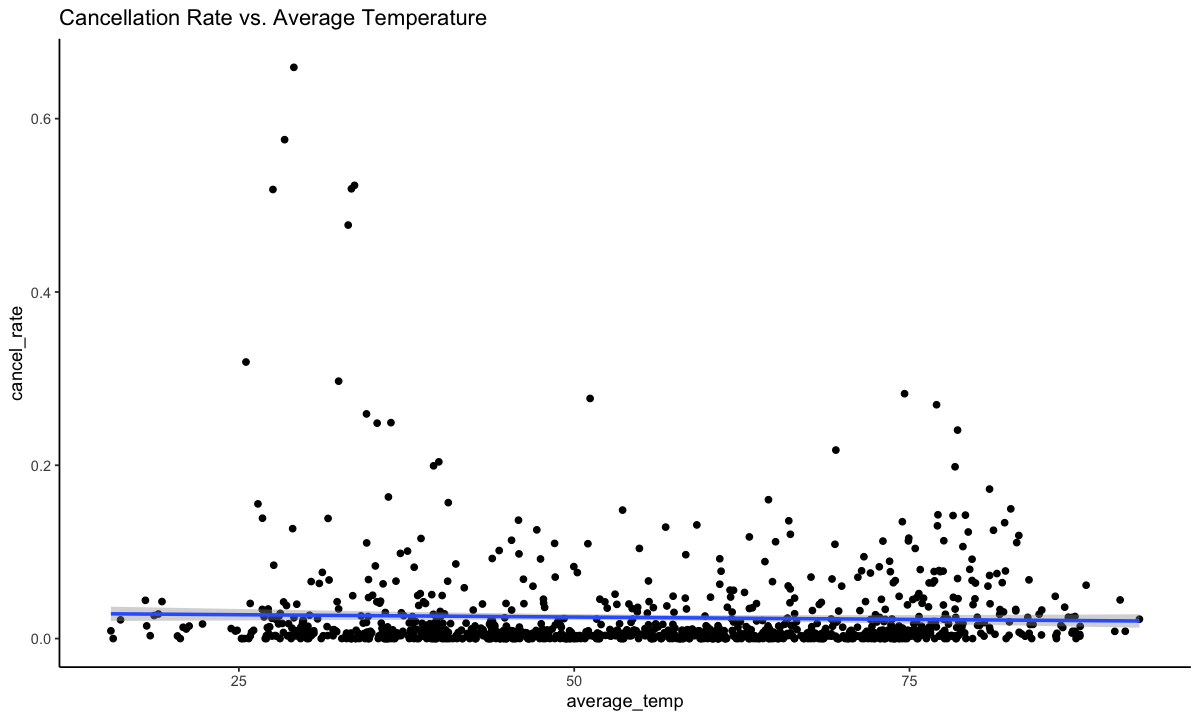

In [ ]:
ggplot(analysis, aes(x = average_temp, y = cancel_rate)) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(title = "Cancellation Rate vs. Average Temperature")